<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Physics-Virtual-Lab" data-toc-modified-id="Physics-Virtual-Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Physics Virtual Lab</a></span><ul class="toc-item"><li><span><a href="#Movimento-retilíneo-uniformemente-variado:-Queda-livre,-análise-de-dados-e-ajuste." data-toc-modified-id="Movimento-retilíneo-uniformemente-variado:-Queda-livre,-análise-de-dados-e-ajuste.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Movimento retilíneo uniformemente variado: Queda livre, análise de dados e ajuste.</a></span><ul class="toc-item"><li><span><a href="#Breve-recaptulação-da-Teoria" data-toc-modified-id="Breve-recaptulação-da-Teoria-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Breve recaptulação da Teoria</a></span></li></ul></li><li><span><a href="#Configuração" data-toc-modified-id="Configuração-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Configuração</a></span></li><li><span><a href="#Importando-dados" data-toc-modified-id="Importando-dados-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Importando dados</a></span></li><li><span><a href="#Selecionando-os-dados-relevantes-(fatiar)" data-toc-modified-id="Selecionando-os-dados-relevantes-(fatiar)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Selecionando os dados relevantes (fatiar)</a></span><ul class="toc-item"><li><span><a href="#Organização-dos-dados" data-toc-modified-id="Organização-dos-dados-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Organização dos dados</a></span></li><li><span><a href="#Obtendo-seu-dado-fatiado" data-toc-modified-id="Obtendo-seu-dado-fatiado-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Obtendo seu dado fatiado</a></span></li></ul></li><li><span><a href="#Ajuste-da-função" data-toc-modified-id="Ajuste-da-função-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ajuste da função</a></span><ul class="toc-item"><li><span><a href="#Qualidade-do-Ajuste" data-toc-modified-id="Qualidade-do-Ajuste-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Qualidade do Ajuste</a></span></li></ul></li><li><span><a href="#Aceleração-gravitacional" data-toc-modified-id="Aceleração-gravitacional-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Aceleração gravitacional</a></span></li></ul></li></ul></div>

# Physics Virtual Lab

## Movimento retilíneo uniformemente variado: Queda livre, análise de dados e ajuste.

Nome: Prof. Leandro de Santana Costa

ra: _____________


### Breve recaptulação da Teoria

Qualquer objeto que é submetido apenas a força da gravidade está em um estado de queda livre. Existem duas características importantes desse movimento que são distintas:

Objetos em queda livre, para a aproximção de um caso ideal, não encontram resistência ao ar. Porém é notável que, em um caso real, qualquer objeto submetido apenas a força gravitacional, sofre a ação da força de resistência do ar em diferentes escalas devido seu formato aerodinâmico.

<img src="queda_1.png" style="width:20px;height:25px"/>

O movimento de queda livre é caracterizado por uma aceleração constante, com valor g = 9.8 $m/s^2$ chamada de aceleração gravitacional.

A imagem abaixo exibe a variação do deslocamento, na direção y em função do tempo. Observe que, por meio de uma aproximação desse movimento a uma série, o deslocamento pode ser escrito como $|\Delta y_{n}| = 10 n - 5$ (n = 0,1,2,...) como ilustrado abaixo. 

<img src="queda_2.png" alt="foo" title="title" style="width:20px;height:20px"/>

A função horária que descreve esse movimento é escrita como

$$y(t) = y_{\text{o}} \pm v_{\text{o}} t \pm \frac{g}{2} t^{2} $$


Onde $y_{\text{o}}$ é a posição na coordenada y no instante $t=0$, $v_{\text{o}}$é a velocidade inicial. Nosso propósito nessa aula, será a análise de dados referente a um determinado experimento de queda livre. O termo $\pm$ refere-se a escolha da orientação do sistema de coordenadas (positivo ou negativo, dependendo da escolha da direção do movimento).


 

## Configuração

Execute os comandos a seguir.
O pacote `pandas`  será usado para manipular o arquivo de planilha. 
(Você poderá saber mais sobre o Pandas [here](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb).)
O `matplotlib` é o pacote para criar gráficos.

In [8]:
# pacotes para manipulação dos dados

from numpy import *
import pandas as pd
%matplotlib inline

# pacote para confecção de gráficos para visualizar os resultados
# de uma maneira mais apreciável e criar nossos modelos
import matplotlib.pyplot as plt

# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 8, 6                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True                    # para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

##  Importando dados

Vamos analisar um conjunto de dados obtidos por meio de um determinado experimento de queda livre. Nos concentraremos no tratamento numérico, ou seja, por meio de um arquivo (tabela) com as medidas de tempo, posição, velocidade e aceleração.

Note que os dados são referentes a um experimento, tendo variações e erros provenientes da própria medida.

Você precisará de um arquivo de dados antes de continuar. 

O pacote `pandas` pode ler um arquivo de planilha` csv`. Importamos `pandas` acima como` pd`, para que você possa usar seu código com `pd. <Nome da função>`.

Você deve ler o arquivo `csv` com o comando na próxima linha. Você deve alterar o nome do arquivo para o que você salvou. Os dados serão mantidos na variável `queda_livre`.

In [9]:
queda_livre = pd.read_csv('lab_03-sample_data.csv')

Mostrando seus dados na tabela.

In [10]:
queda_livre[21:30]

,Tempo (s),Posição (m),Velocidade (m/s),Acceleração (m/s²)
21,1.10,0.771,-2.728,9.173
22,1.15,0.647,-2.245,9.640
23,1.20,0.546,-1.757,9.805
24,1.25,0.471,-1.260,9.835
25,1.30,0.420,-0.770,9.789
26,1.35,0.394,-0.283,9.756
27,1.40,0.392,0.204,9.768
28,1.45,0.415,0.692,9.825
29,1.50,0.461,1.183,9.920


Queremos tirar os valores dos dados da tabela para podermos trabalhar com os números. Precisamos saber os nomes das colunas, chamadas de "chaves".

In [11]:
queda_livre.keys()

Index(['Tempo (s)', 'Posição (m)', 'Velocidade (m/s)', 'Acceleração (m/s²)'], dtype='object')

Nós obtemos as colunas necessárias nas variáveis que chamaremos de `t_all` e` y_all`.

In [12]:
t_all = queda_livre['Tempo (s)'].values
y_all = queda_livre['Posição (m)'].values

Faça um gráfico rápido desses dados. Você pode fazer isso com as bibliotecas que importamos acima como `plt`.

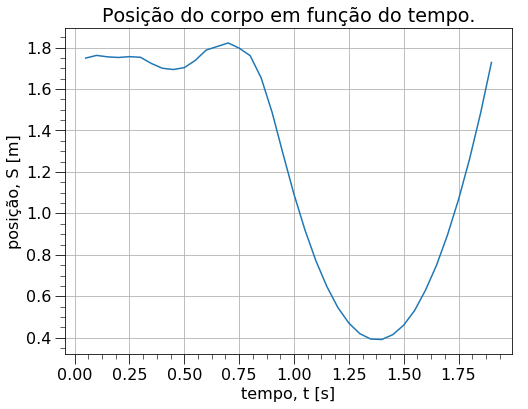

In [13]:
plt.grid()

# é importante colocar o nome das quantidade nos eixos
plt.xlabel('tempo, t [s]');
plt.ylabel('posição, S [m]');
plt.title('Posição do corpo em função do tempo.');
plt.plot(t_all,y_all)

Note que a parte inicial dos dados não segue o comportamento de um gráfico que representa a queda livre de um corpo, que se deve a parte inicial do experimento onde ruídos são mais comuns. Porém vamos nos concentrar no comportamento da parabola e, para isso vamos selecionar os dados de forma conveniente.

## Selecionando os dados relevantes (fatiar)

###  Organização dos dados

O termo "fatiar" refere-se a uma parte de um conjunto de dados. Queremos obter apenas a fatia que inclui os dados de queda livre: a parábola. Para fazer isso, usamos indicações nas matrizes de dados.

Aqui está um exemplo de uma matriz `A` com alguns dados:

In [14]:
A_a = array((42,44,47,50,54))
print(A_a)

[42 44 47 50 54]


Agora defina uma nova matriz chamada `B` que tenha apenas uma fatia dos dados` A` do índice `0` ao índice` 3` (ou seja, os três primeiros elementos de `A`):

In [15]:
B_b= A_a[0:3]
print(B_b)

[42 44 47]


###  Obtendo seu dado fatiado

Queremos encontrar um índice inicial e final (`i, f`) para o seu conjunto de dados, para que apenas consideremos os dados de queda livre (parabólica).

Você precisará brincar com a primeira linha no seguinte bloco de código:

> `i,f = 18,38`

Altere os índices inicial e final e plote os dados. Mude novamente até encontrar a fatia de dados perfeita.

O código após o corte de dados plotado $y$ versus $t$, bem como $\Delta y$ versus $t$ é mostrado abaixo. Uma olhada em ambos ajudará a obter a melhor fatia possível. (Veja  [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) para aprender mais sobre gráfico de funções.)

Text(0.5, 1.0, '$\\Delta$ y')

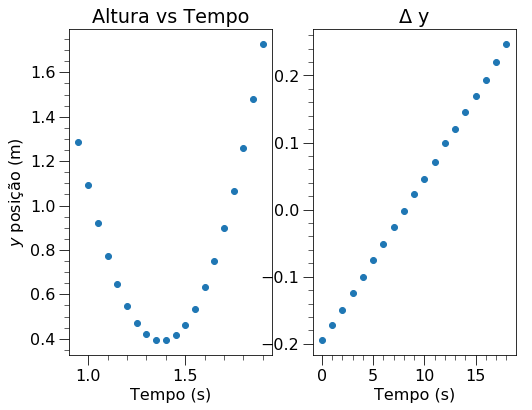

In [59]:
i,f = 18,38          # you'll need to change these to get the right slice
t = t_all[i:f]                # t is a slice of t_all
y = y_all[i:f]                # y is a slice of y_all


# make plots:
plt.subplot(121)      # 221 means "on a 2x2 grid, plot number 1"
#plt.grid()
plt.plot(t,y,'o',label='')
plt.xlabel('Tempo (s)')            # label time axis 
plt.ylabel('$y$ posição (m)')    # label position axis 
plt.title('Altura vs Tempo')
plt.subplot(122)      # 222 means "on a 2x2 grid, plot number 2"
#plt.grid()
plt.plot( y[1:]-y[:-1],'o',label='')
plt.xlabel('Tempo (s)')            # label time axis 
plt.title('$\Delta$ y')

##  Ajuste da função

A melhor maneira de encontrar o valor da aceleração de queda livre é * ajustar uma função * aos nossos dados. Esta é uma técnica experimental útil.

Suponha que tentamos encontrar a função polinomial

$$
p(t) = A t^2 + B t + C \approx y(t)
$$ 

que melhor corresponda ao nosso conjunto de dados. O Python numérico (`numpy`) pode fazer isso com a função `polyfit`. Você pode aprender os detalhes no [polyfit documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html).

Esperamos que nossos dados de $ y $ versus $ t $ sigam um polinômio porque, em queda livre, a equação de movimento é

$$
y(t) = y_0 + v_0 t + \tfrac{1}{2} a t^2
$$

onde $ a $ é a aceleração devido à gravidade (também chamada de $ g $).

Vamos aplicar os nossos dados à função `polyfit` com os parâmetros A, B e C que ela ajuste a um polinômio de grau 2 - isto é, uma parábola. A função retorna os coeficientes $ A, B, C $ que melhor se ajustam aos nossos dados.

In [25]:
A,B,C = polyfit(t,y,2)       # fit a degree-2 polynomial to the t,y data
print('best fit parabola has coefficients')
print('     A=',A,'B=',B,'C=',C)

best fit parabola has coefficients
     A= 4.908452950558197 B= -13.531136021872824 C= 9.714826406926377


Vamos ver o quão bem esse polinômio se ajusta aos nossos dados, os colocando juntos em um mesmo gráfico.

Para plotar a parábola, usaremos a função `linspace` para criar uma matriz de muitos valores de tempo, do índice` 0` até a última unidade determinada, `t [-1]`. Em seguida, conecte esses tempos no polinômio com os valores de `A, B, C` que encontramos acima.

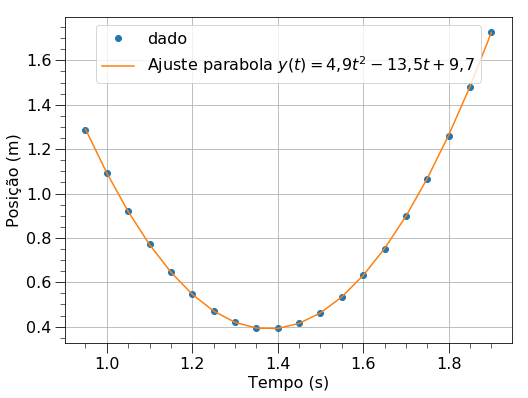

In [61]:
t_axis = linspace(t[0],t[-1],20)     # t_axis is an array of 20 values from initial to final
pp = A*t_axis**2 + B*t_axis + C       # evaluate the polynomial at all tt values
plt.plot(t,y,'o',label='dado')    # plot the data with dots ('o')
plt.grid()
plt.plot(t_axis,pp,label='Ajuste parabola $y(t)=4,\!9t^{2} -13,\!5t + 9,\!7$')  # plot the parabola at the t_axis times
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend(loc='upper center')        # show graph legend 

Se você não vir uma linha passando com precisão pelos seus dados, verifique as etapas anteriores.

O processo usado pela função `polyfit` é chamado de" ajuste de mínimos quadrados ". Você pode aprender mais sobre isso em [this summary](https://www.colorado.edu/physics/phys3340/phys3340_sp12/CourseInformation/Activities/Measurement_and_Uncertainty/Error%20Analysis%20Activity%202.pdf) (pdf), ou em [proper treatment of error analysis](https://www.amazon.com/Introduction-Error-Analysis-Uncertainties-Measurements/dp/093570275X).

Aliás, se você deseja salvar o gráfico criado acima, para isso adicione a linha

    plt.savefig('medida_g')
    
no final da célula anterior (nomeie como quiser).

### Qualidade do Ajuste

Com base na aula anterior, iremos aplicar a nossa análise, o teste $R^{2}$, para termos, qualitativamente a informação sobre a relevancia estatística de nosso estudo. 

In [41]:
import numpy as np

# Obtendo o valor de R2
yresid = y - pp # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação

print('Melhor ajuste com os coeficientes', 'A=', A,', B=',B,'e C=',C) # imprime o intercepto e a inclinação # imprime o intercepto e a inclinação
print('R2:',R2) # imprime coeficiente de determinação

Melhor ajuste com os coeficientes A= 4.908452950558197 , B= -13.531136021872824 e C= 9.714826406926377
R2: 0.9999890864549217


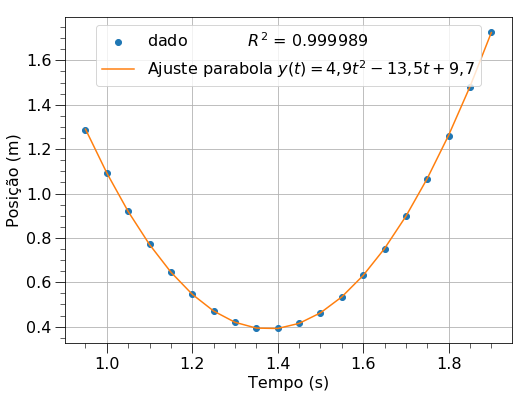

In [62]:
plt.grid()
plt.plot(t,y,'o',label='dado            $R^{2}$ = 0.999989')    # plot the data with dots ('o')
plt.plot(t_axis,pp,label='Ajuste parabola $y(t)=4,\!9t^{2} -13,\!5t + 9,\!7$')  # plot the parabola at the t_axis times
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend(loc='upper center')        # show graph legend 

## Aceleração gravitacional

Qual é a incerteza nos coeficientes de ajuste? Agora temos o coeficiente $ A $ desde o ajuste, mas queremos saber $ A \pm \delta A $, onde $ \delta A $ é a incerteza absoluta.

Quando a função `polyfit` é chamada com um parâmetro adicional:

    polyfit(t,y,2,cov=True)
    

retorna os coeficientes `A, B, C` como antes e também uma" matriz de covariância "que fornece a variação em cada um dos coeficientes de ajuste. A covariancia é o quadrado do desvio padrão e o desvio padrão é a incerteza no coeficiente de ajuste. A variância de cada coeficiente aparece na diagonal da matriz de covariância. Esses termos foram analisados nos módulos inicias desse curso.

Encontramos a incerteza em cada parâmetro de ajuste (`dA, dB, dC`) da seguinte forma:

In [54]:
(A,B,C),covariance = polyfit(t,y,2,cov=True)        # Ajuste com a matriz de covariância
dA,dB,dC = sqrt(diag(covariance))
print('fit coefficients are')
print('   A = ',A,'±',dA,'m/s^2')
print('   B = ',B,'±',dB,'m/s')
print('   C = ',C,'±',dC,'m')

fit coefficients are
   A =  4.908452950558197 ± 0.004184153373404676 m/s^2
   B =  -13.531136021872824 ± 0.011973187186548296 m/s
   C =  9.714826406926377 ± 0.008297149500519924 m


Agora você mostrar a medida da experiência para o valor da aceleração devido à queda livre, $g$, juntamente com a incerteza.


In [55]:
g = 9.714826406926377    # 
dg = 0.008297149500519924   # 
print('Medida do valor de g = ',g,'±',dg,'m/s^2')



Medida do valor de g =  9.714826406926377 ± 0.008297149500519924 m/s^2
